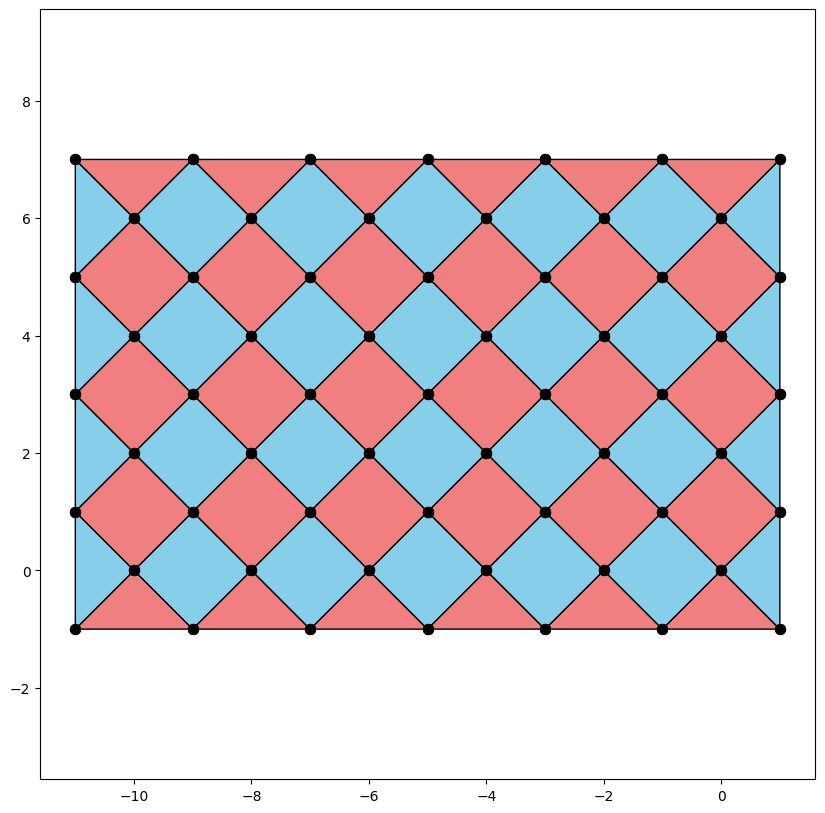

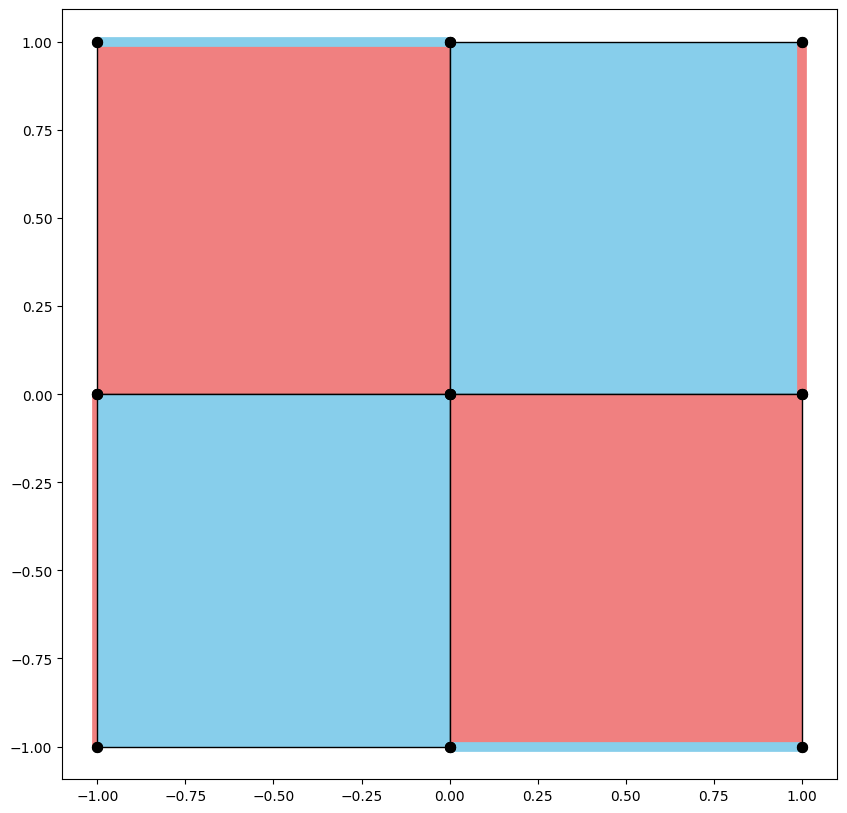

In [43]:

from qiskit_qec.codes.codebuilders.surface_code_builder import SurfaceCodeBuilder

code = SurfaceCodeBuilder(dx=5, dz=7).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue")

from qiskit_qec.operators.pauli import Pauli
from qiskit_qec.codes.codebuilders.rotated_surface_code_builer import RotatedSurfaceCodeBuilder

code = RotatedSurfaceCodeBuilder(d=3, ul_op=Pauli("X")).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue")

In [44]:
from qiskit_qec.circuits import SurfaceCodeCircuit

code = SurfaceCodeCircuit(3,1,)

qc = code.circuit['0']

In [53]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
 
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

num_qubits = 4
# gate errors/fidelity
# p_G = [np.random.random(num_qubits)*.05]
p_G = .1

error_global_gate = depolarizing_error(p_G,num_qubits=num_qubits)

# dephasing/relaxation 
T_1 = 50e-5 # relaxation time
# T_2 = 1e-7 # time scale/dephasing
T_2 = 50e-6 # time scale/dephasing
tau_i = 2e-6 # idling time

p_T_1 = tau_i/(4*T_1)
p_T_2 = np.abs((tau_i**2/(2*T_2**2)) - p_T_1)

error_relaxation = pauli_error([("I",1-p_T_1),("X",p_T_1/2),("Y",p_T_1/2)])
error_dephasing = pauli_error([("I",1-p_T_2),("Z",p_T_2)])

# readout 
T_1R = 1e-4 # decoherence time
tau_min = 1.5e-6 # minimum integration time

#readout
p_R = lambda tau_R : 1 - (1-np.exp(-tau_R/tau_min))*np.exp(-tau_R/T_1R)  # noqa: E731

#initialization/reset
# F_init = 0.05
# p_res = (8/15)*(1-F_init)
p_res = .05

tau_R = 1e-6
error_readout_reset = ReadoutError([[p_res*(1-p_R(tau_R)), 1-(p_res*(1-p_R(tau_R)))], [p_R(tau_R)*(1-p_res), 1 - p_R(tau_R)*(1-p_res)]])

spin_noise_model = NoiseModel()
spin_noise_model.add_all_qubit_quantum_error(error_relaxation,"relaxation")
spin_noise_model.add_all_qubit_quantum_error(error_dephasing,"dephasing")
spin_noise_model.add_all_qubit_quantum_error(error_global_gate,"gate")
spin_noise_model.add_all_qubit_readout_error(error_readout_reset,"readout_reset")

sim_noise = AerSimulator(noise_model=spin_noise_model)

In [54]:
from qiskit_qec.decoders.decoding_graph import DecodingGraph

dec_graph = DecodingGraph(code=code)

In [55]:
from qiskit import transpile

tqc = transpile(qc,sim_noise)

result = sim_noise.run(tqc).result()

# plot_histogram(,figsize=(200,150))
counts = result.get_counts(0)

In [56]:
counts

{'101100111 1111 1111': 1,
 '011011010 0110 1111': 1,
 '110100101 0111 1111': 1,
 '010111111 0111 0111': 1,
 '110111100 1110 1111': 1,
 '100111101 1110 1111': 1,
 '101111010 1011 0111': 1,
 '010110111 1111 1111': 1,
 '111110111 1111 1101': 1,
 '111100110 0001 1111': 1,
 '010111101 1011 1111': 1,
 '111010011 1111 1011': 1,
 '101100111 1011 1111': 1,
 '111110101 1111 1111': 1,
 '101001001 1111 1111': 1,
 '110101100 1111 1111': 1,
 '111110101 1110 1101': 1,
 '101111001 1011 1101': 1,
 '001001011 0111 1111': 1,
 '100111010 1110 1111': 1,
 '100111110 1111 1111': 1,
 '001010100 1110 1111': 1,
 '111111110 0001 1111': 1,
 '101101111 1001 1111': 1,
 '111111111 1110 1011': 1,
 '110101001 0110 1111': 2,
 '001010010 0100 1111': 1,
 '110010101 1101 1111': 1,
 '011010110 0110 0111': 1,
 '010110011 0110 1111': 1,
 '111111101 1011 1111': 2,
 '101011110 1101 1111': 1,
 '100111110 0000 1111': 1,
 '011001101 0001 1111': 1,
 '111111111 0110 1110': 1,
 '101111101 0111 1111': 1,
 '111110111 1101 1111': 1,
 

In [50]:
dec_graph.

In [42]:
dec_graph.get_error_probs(counts=counts)

{(0, 1): 0.02353168119639959,
 (3, 4): 0.03519570001913519,
 (5, 4): 0,
 (5, 3): 0.0004790804435005347,
 (6, 7): 0.020735419326351312,
 (0, 7): 0.004212312024976739,
 (0, 6): 0.0006127960698706914,
 (1, 4): 0.18131128040045097,
 (5, 9): 0.01810744806092951,
 (9, 4): 0.1752404735808355,
 (0, 3): 0.0016219413359477852,
 (3, 1): 0,
 (1, 7): 0.18639899835093937,
 (1, 1): 0.5820317304893284,
 (0, 0): 1.0128388516248155,
 (7, 7): 0.8505704585058811,
 (6, 6): 0.9977911024584343,
 (5, 5): 0.9979865914705532,
 (9, 9): 0.8369625916735755,
 (3, 3): 1.0116453870595108,
 (4, 4): 0.6319516034713044}

In [30]:
dec_graph.weight_syndrome_graph(counts)

In [49]:
dec_graph.graph.edges()

[DecodingGraphEdge(qubits=[], weight=1, properties={}),
 DecodingGraphEdge(qubits=[1, 2], weight=1, properties={}),
 DecodingGraphEdge(qubits=[1, 2], weight=1, properties={}),
 DecodingGraphEdge(qubits=[], weight=1, properties={}),
 DecodingGraphEdge(qubits=[3], weight=1, properties={}),
 DecodingGraphEdge(qubits=[3], weight=1, properties={}),
 DecodingGraphEdge(qubits=[], weight=1, properties={}),
 DecodingGraphEdge(qubits=[5], weight=1, properties={}),
 DecodingGraphEdge(qubits=[5], weight=1, properties={}),
 DecodingGraphEdge(qubits=[8], weight=1, properties={}),
 DecodingGraphEdge(qubits=[8], weight=1, properties={}),
 DecodingGraphEdge(qubits=[0], weight=1, properties={}),
 DecodingGraphEdge(qubits=[4], weight=1, properties={}),
 DecodingGraphEdge(qubits=[], weight=1, properties={}),
 DecodingGraphEdge(qubits=[0], weight=1, properties={}),
 DecodingGraphEdge(qubits=[3], weight=1, properties={}),
 DecodingGraphEdge(qubits=[4], weight=1, properties={}),
 DecodingGraphEdge(qubits=[4]